## *Analiza incydentów cyberbezpieczeństwa z lat 2015–2024 z zastosowaniem metod eksploracji danych* 


### Import bibliotek oraz danych

In [18]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import xgboost as xgb



df = pd.read_csv('Global_Cybersecurity_Threats_2015-2024.csv')
df.head()

,Country,Year,Attack Type,Target Industry,Financial Loss (in Million $),Number of Affected Users,Attack Source,Security Vulnerability Type,Defense Mechanism Used,Incident Resolution Time (in Hours)
0,China,2019,Phishing,Education,80.53,773169,Hacker Group,Unpatched Software,VPN,63
1,China,2019,Ransomware,Retail,62.19,295961,Hacker Group,Unpatched Software,Firewall,71
2,India,2017,Man-in-the-Middle,IT,38.65,605895,Hacker Group,Weak Passwords,VPN,20
3,UK,2024,Ransomware,Telecommunications,41.44,659320,Nation-state,Social Engineering,AI-based Detection,7
4,Germany,2018,Man-in-the-Middle,IT,74.41,810682,Insider,Social Engineering,VPN,68


### 1) Opis danych 

Zbiór danych przedstawia informacje o globalnych incydentach związanych z cyberbezpieczeństwem, zarejestrowanych w latach 2015–2024. Dane te mogą być pomocne w analizie zagrożeń, identyfikacji trendów oraz ocenie skuteczności mechanizmów obronnych stosowanych przez organizacje.

Każdy wiersz w zbiorze reprezentuje pojedynczy incydent i zawiera zestaw atrybutów opisujących kontekst zdarzenia, jego charakter, skalę oraz skutki. Dane mają charakter przekrojowy i obejmują zarówno zmienne kategoryczne, jak i liczbowe.  

Kolumny w zbiorze danych:
| Kolumna | Opis |
|---------|------|
| `Country` | Kraj, w którym odnotowano atak |
| `Year` | Rok incydentu |
| `Attack Type` | Rodzaj ataku (np. phishing, ransomware) |
| `Target Industry` | Branża będąca celem |
| `Financial Loss (in Million $)` | Straty finansowe w milionach dolarów |
| `Number of Affected Users` | Liczba użytkowników, których dotknął incydent |
| `Attack Source` | Kto stoi za atakiem (np. grupa hakerska, insider) |
| `Security Vulnerability Type` | Rodzaj wykorzystanej luki |
| `Defense Mechanism Used` | Zastosowane mechanizmy obronne |
| `Incident Resolution Time (in Hours)` | Czas rozwiązania incydentu |

### Struktura danych

In [5]:
df.__class__

pandas.core.frame.DataFrame

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 10 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Country                              3000 non-null   object 
 1   Year                                 3000 non-null   int64  
 2   Attack Type                          3000 non-null   object 
 3   Target Industry                      3000 non-null   object 
 4   Financial Loss (in Million $)        3000 non-null   float64
 5   Number of Affected Users             3000 non-null   int64  
 6   Attack Source                        3000 non-null   object 
 7   Security Vulnerability Type          3000 non-null   object 
 8   Defense Mechanism Used               3000 non-null   object 
 9   Incident Resolution Time (in Hours)  3000 non-null   int64  
dtypes: float64(1), int64(3), object(6)
memory usage: 234.5+ KB


### Statystyka opisowa dla kolumn liczbowych

In [17]:
df.describe()

,Year,Financial Loss (in Million $),Number of Affected Users,Incident Resolution Time (in Hours)
count,3000.000000,3000.000000,3000.000000,3000.000000
mean,2019.570333,50.492970,504684.136333,36.476000
std,2.857932,28.791415,289944.084972,20.570768
min,2015.000000,0.500000,424.000000,1.000000
25%,2017.000000,25.757500,255805.250000,19.000000
50%,2020.000000,50.795000,504513.000000,37.000000
75%,2022.000000,75.630000,758088.500000,55.000000
max,2024.000000,99.990000,999635.000000,72.000000


### 2) Cel projektu

Projekt ma na celu **wielowymiarowe zrozumienie współczesnego krajobrazu cyberzagrożeń** poprzez analizę kompleksowego zbioru danych o incydentach z lat 2015-2024.

Szczegółowe cele:

1. Identyfikacja kluczowych zagrożeń
- Określenie które typy ataków (phishing, ransomware itd.) dominują w różnych regionach i branżach
- Analiza ewolucji zagrożeń w czasie (2015-2024)
- Identyfikacja najbardziej kosztownych rodzajów ataków

2. Ocena skuteczności mechanizmów obronnych
- Analiza zależności między zastosowanymi zabezpieczeniami a czasem reakcji
- Identyfikacja najskuteczniejszych strategii obronnych
- Ocena wpływu rodzaju luki bezpieczeństwa na skutki ataku

3. Prognozowanie ryzyka  
- Tworzenie modeli predykcyjnych dla:
- Prawdopodobieństwa wystąpienia określonych typów ataków
- Potencjalnych strat finansowych
- Przewidywanego czasu neutralizacji zagrożeń

Wybrane metody analizy:
- **Drzewa decyzyjne** - do klasyfikacji typów ataków i predykcji skutków
- **k-średnich** - do segmentacji ataków na grupy ryzyka


### Typy ataków w czasie

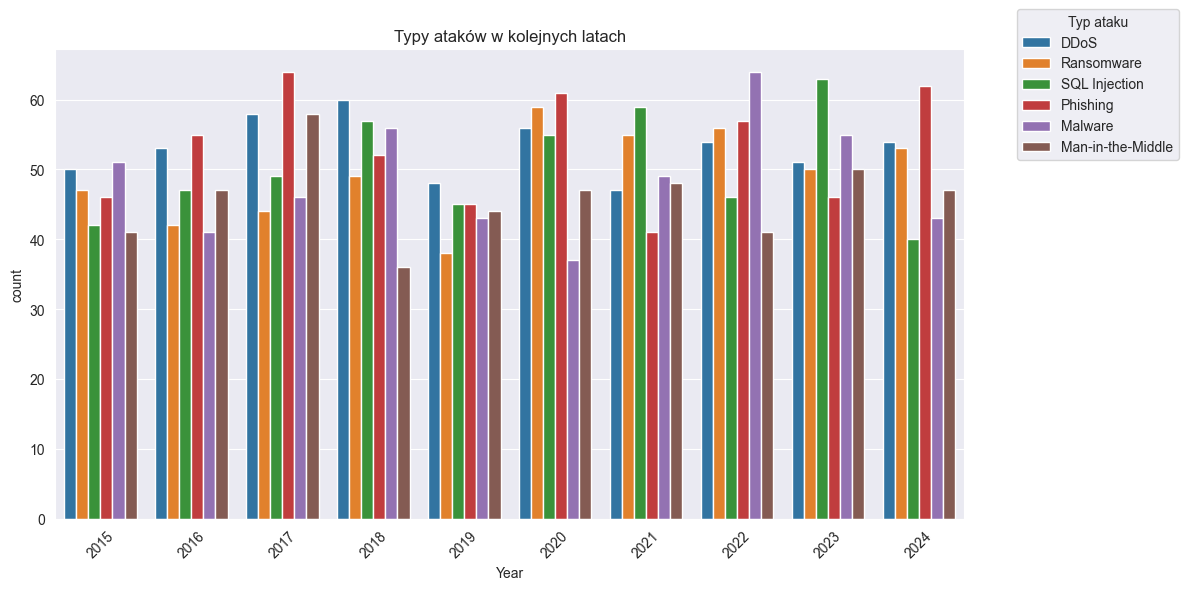

In [11]:
plt.figure(figsize=(12,6))
sns.countplot(data=df, x='Year', hue='Attack Type')
plt.title('Typy ataków w kolejnych latach')
plt.xticks(rotation=45)
plt.legend(title='Typ ataku', bbox_to_anchor=(1.05, 1.1))
plt.tight_layout()
plt.show()


### Straty finansowe według kraju

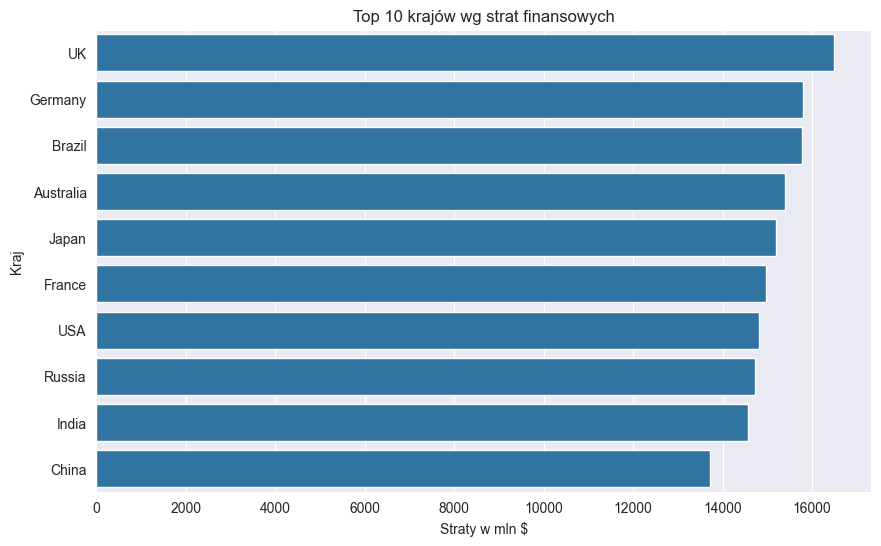

In [12]:
plt.figure(figsize=(10,6))
top_countries = df.groupby('Country')['Financial Loss (in Million $)'].sum().sort_values(ascending=False).head(10)
sns.barplot(x=top_countries.values, y=top_countries.index)
plt.title('Top 10 krajów wg strat finansowych')
plt.xlabel('Straty w mln $')
plt.ylabel('Kraj')
plt.show()


### Średni czas rozwiązania incydentu według branży


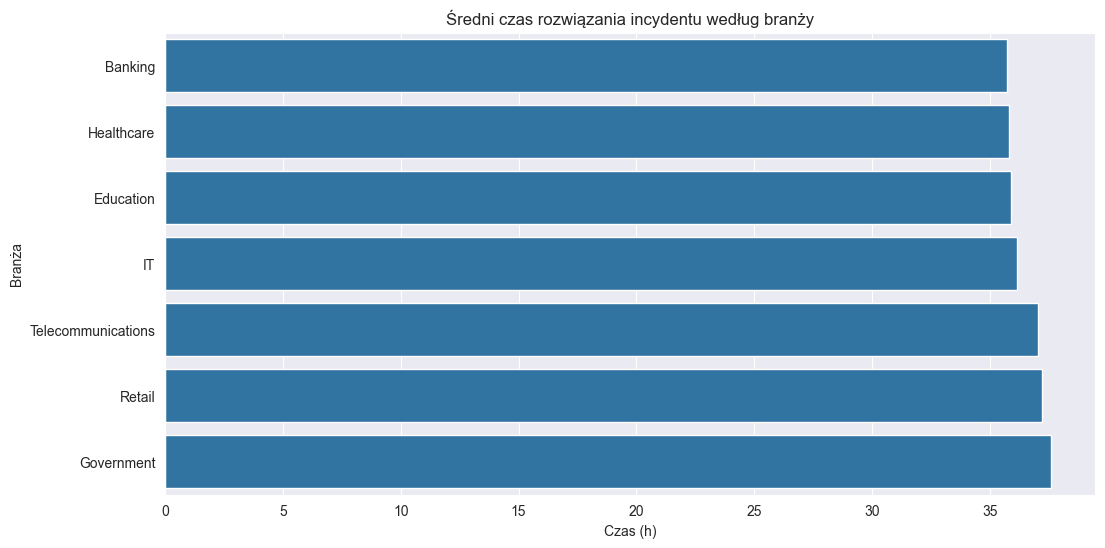

In [13]:
plt.figure(figsize=(12,6))
industry_time = df.groupby('Target Industry')['Incident Resolution Time (in Hours)'].mean().sort_values()
sns.barplot(x=industry_time.values, y=industry_time.index)
plt.title('Średni czas rozwiązania incydentu według branży')
plt.xlabel('Czas (h)')
plt.ylabel('Branża')
plt.show()
